In [1]:
import pickle as pkl
import viz_sequence
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
import h5py
from scipy.special import softmax

hintatac_corrected="/srv/scratch/anusri/chrombpnet_paper/hint_atac_scripts/GM12878/hintatac_ATAC_07.27.2021/model/"
tobias_corrected="/srv/scratch/anusri/chrombpnet_paper/tobias_scripts/GM12878/tobias_ATAC_08.03.2021/final_model/unplug/"
chrombpnet_corrected="/srv/scratch/anusri/chrombpnet_paper/GM12878/ATAC_07.22.2021/final_model_step3_new/unplug/"


import numpy as np
from scipy.stats import entropy

In [2]:
pfile=hintatac_corrected+"model.0.predictions"
f=h5py.File(pfile,'r')
labels_0=f['lab_0'][:]
pred_0=f['pred_0'][:]
coord=f['coords'][:]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
print(coord_fixed[0])


hintatac_pred_0_softmax=softmax(pred_0,axis=1)

pred_0_softmax=softmax(pred_0,axis=1)


['chr1', '804558', '.']


In [3]:
pfile=tobias_corrected+"model.0.predictions"
f=h5py.File(pfile,'r')
labels_0=f['lab_0'][:]
pred_0=f['pred_0'][:]
coord=f['coords'][:]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
print(coord_fixed[0])


tobias_pred_0_softmax=softmax(pred_0,axis=1)

pred_0_softmax=softmax(pred_0,axis=1)


['chr1', '804558', '.']


In [4]:
pfile=chrombpnet_corrected+"model.0.predictions"
f=h5py.File(pfile,'r')
labels_0=f['lab_0'][:]
labels_1=f['lab_1'][:]
pred_0=f['pred_0'][:]
pred_1=f['pred_1'][:]
coord=f['coords'][:]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
print(coord_fixed[0])

chrombpnet_pred_0_softmax=softmax(pred_0,axis=1)

['chr1', '804558', '.']


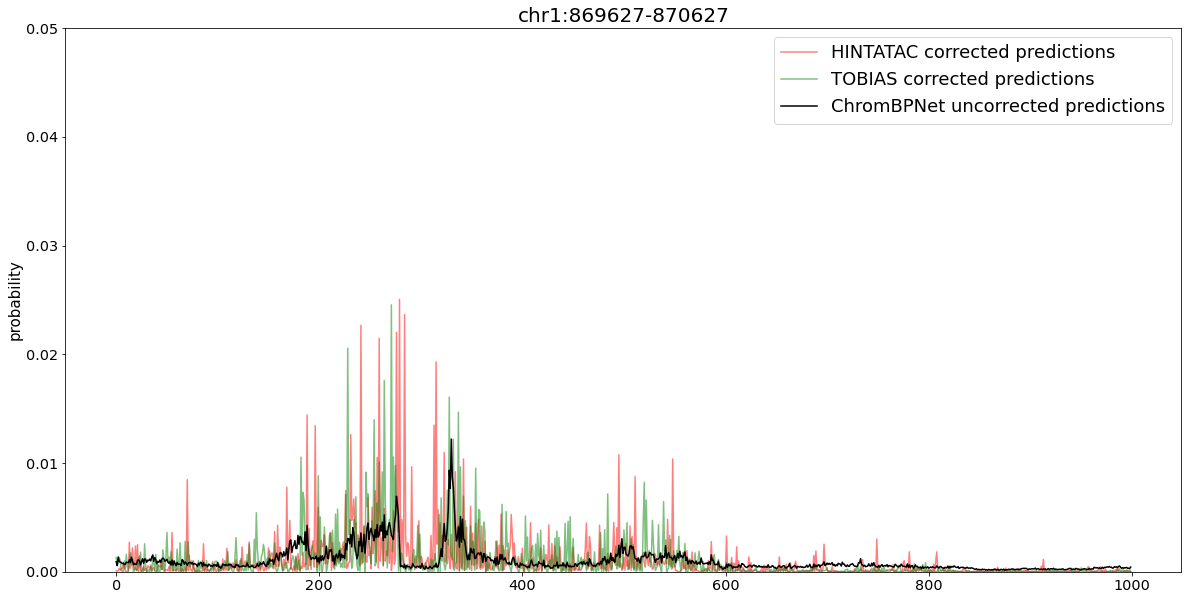

In [20]:
index=6
plt.figure()
plt.rcParams["figure.figsize"] = (20, 10) # (w, h)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':20,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.plot(hintatac_pred_0_softmax[index,:], label="HINTATAC corrected predictions", color="r", alpha=0.5)
plt.plot(tobias_pred_0_softmax[index,:], label="TOBIAS corrected predictions", color="green", alpha=0.5)
plt.plot(chrombpnet_pred_0_softmax[index,:], label="ChromBPNet uncorrected predictions",color="k")

plt.ylabel('probability',fontsize = 15) #xlabel
plt.title(coord_fixed[index][0]+":"+str(int(coord_fixed[index][1])-500)+"-"+str(int(coord_fixed[index][1])+500))
#plt.xlabel('500 base-pair flanks around summit', fontsize = 15)#ylabel
plt.legend(fontsize=18)
plt.ylim((0.00,0.05))
plt.show()


